In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *


In [46]:
plt.rcParams['font.size']=28
plt.rcParams['axes.linewidth']=1.
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.minor.size']=0.2
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=2.
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=12
plt.rcParams['ytick.minor.size']=6
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=2
plt.rcParams['ytick.direction']='in'

In [2]:
folder_list = [ 'N4Gpu/16pcNoAMR/NewTry', 'N4Gpu/4pcnoAMR-ScalarFix', 'N4Gpu/2pcNoAMR/PltFiles/']

In [79]:

average_etaM = []
average_etaZ = []
etaM_16 = []
etaM_84 = []

etaZ_16 = []
etaZ_84 = []
z_axis = [] 

for folder in folder_list:
    input_folder = os.path.join(h5_path, folder, 'Eta/')
    os.chdir(input_folder)
    list_file = glob.glob("*.npz")
    etaM = []
    etaZ = []

    for file in list_file:
        f = np.load(file)
        time = f["timestep"]
        
        if(time>0. and time<116.):
            etaM.append(f["etaM"]) 
            etaZ.append(f["etaZ"]) 
    etaM = np.asarray(etaM)
    etaM16 = np.percentile(etaM, 16, axis=0)
    etaM84 = np.percentile(etaM, 84, axis=0)
    
    
    etaZ= np.asarray(etaZ)
    etaZ16 = np.percentile(etaZ, 16, axis=0)
    etaZ84 = np.percentile(etaZ, 84, axis=0)
    
    average_etaM.append(np.average(etaM, axis=0))
    average_etaZ.append(np.average(etaZ, axis=0))
    
    etaM_16.append(etaM16)
    etaM_84.append(etaM84)
    
    etaZ_16.append(etaZ16)
    etaZ_84.append(etaZ84)
    
    z_axis.append(f["zrange"])
    i+=1

Text(0, 0.5, '$\\eta_Z$')

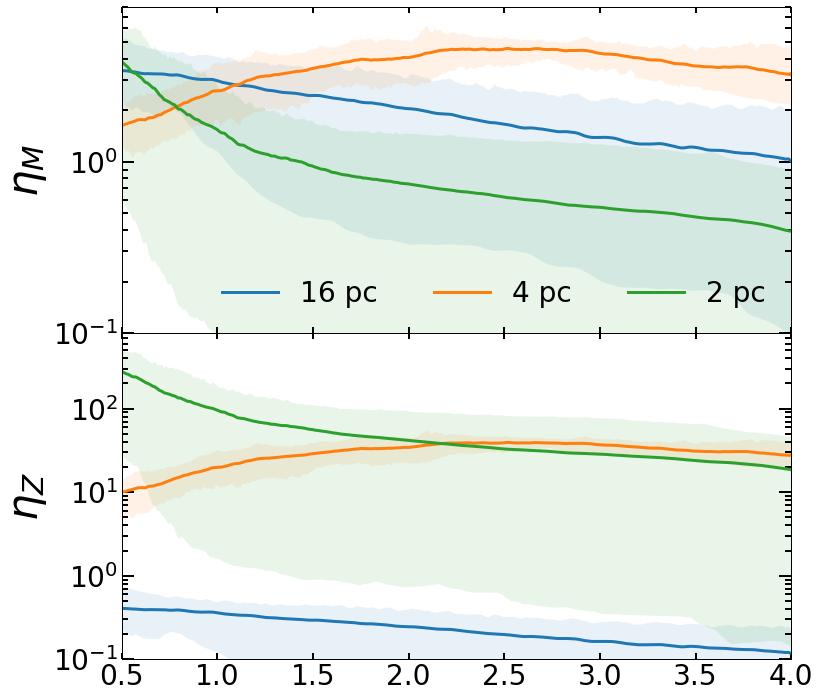

In [80]:
fig, ax = plt.subplots(2, 1, gridspec_kw = {'wspace':0.0, 'hspace':0.0},figsize=(12, 12))
lw = 3.0
label = ['16 pc', '4 pc', '2 pc']
for i in range(len(z_axis)):
    zrange = np.asarray(z_axis[i])
    etaM_  = np.asarray(average_etaM[i])
    etaZ_  = np.asarray(average_etaZ[i])
    etaM16_ = np.asarray(etaM_16[i])
    etaM84_ = np.asarray(etaM_84[i])
    etaZ16_ = np.asarray(etaZ_16[i])
    etaZ84_ = np.asarray(etaZ_84[i])
    
    ax[0].plot(zrange/kpc, etaM_, lw=lw, label=label[i])
    ax[0].fill_between(zrange/kpc, etaM16_, etaM84_, alpha=0.1)
    
    ax[1].plot(zrange/kpc, etaZ_, lw=lw)
    ax[1].fill_between(zrange/kpc, etaZ16_, etaZ84_, alpha=0.1)
    
plt.setp(ax, 'xlim', (0.5, 4.0))
ax[0].set_ylim(0.1, 8.)
ax[0].legend(ncol=3, frameon=False, loc='lower right')
ax[1].set_ylim(1.e-1, 8.e2)
plt.setp(ax, 'yscale', 'log')
ax[0].tick_params(axis='x', labelbottom=False, top=True, bottom=True)
ax[0].tick_params(axis='y', which='both',right=True)

ax[1].tick_params(axis='x', top=True, bottom=True)
ax[1].tick_params(axis='y', which='both',right=True)

ax[0].set_ylabel(r'$\eta_M$', fontsize=42)
ax[1].set_ylabel(r'$\eta_Z$', fontsize=42)